In [1]:
from src.pyropy import firebehaviour as fb
from src.pyropy import weatherdata as wd

In [2]:
weather_fn = 'tests/.data/weather_gridded_in.csv'
weather_df = wd.gridded_to_df(weather_fn)
incident = fb.Incident(weather_df)
incident.print(head=True)

            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7    17   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7    15   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7    14   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7    17   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7    24   

   gfdi  
0     1  
1     1  
2     1  
3     2  
4     4  


In [3]:
incident.compare_fbcalc('tests/.data/FireBehaviourCalcs_Test.xlsm', ['mk5','vesta', 'mc'])
incident.print(head=True)

            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7  15.3   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7  14.0   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7  13.2   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7  15.9   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7  21.9   

   gfdi  mk5_fbcalc  fros_mk5  vesta_fbcalc   mc  fros_vesta  mc_fbcalc  
0     1         274       275           463  6.7         719          6  
1     1         251       252           351  6.8         543          6  
2     1         237       237           420  7.4         620          7  
3     2         286       286           680  7.6         977          7  
4     4         393       394           974  7.0        1420          6  


C:\Users\geoffg\.conda\envs\fb_310\lib\site-packages\openpyxl\reader\drawings.py:59: UserWarning: wmf image format is not supported so the image is being dropped
  warn(msg)


In [4]:
incident.compare_amicus('tests/.data/amicus_vesta3.csv')
incident.print(head=True)

UTF-8
            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7  15.3   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7  14.0   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7  13.2   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7  15.9   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7  21.9   

   gfdi  mk5_fbcalc  fros_mk5  vesta_fbcalc   mc  fros_vesta  mc_fbcalc  \
0     1         274       275           463  6.7         719          6   
1     1         251       252           351  6.8         543          6   
2     1         237       237           420  7.4         620          7   
3     2         286       286           680  7.6         977          7   
4     4         393       394           974  7.0        1420          6   

   mc_amicus  vesta_amicus  
0        6.7           716  
1        6.8    

In [5]:
fhr_params = {'fhr_surf': 'H', 'fhr_n_surf':'M'}
incident.set_params(fhr_params)
incident.run_forest_vesta_fhr()
incident.print(head=True)

            date_time  temp  humidity  wind_speed  wind_dir  drought  ffdi  \
0 2021-12-19 04:00:00  23.9      24.2          16        36      8.7  15.3   
1 2021-12-19 05:00:00  23.6      24.4          13       312      8.7  14.0   
2 2021-12-19 06:00:00  22.7      27.3          16       336      8.7  13.2   
3 2021-12-19 07:00:00  23.0      28.2          25         2      8.7  15.9   
4 2021-12-19 08:00:00  25.3      26.0          32         0      8.7  21.9   

   gfdi  mk5_fbcalc  fros_mk5  vesta_fbcalc   mc  fros_vesta  mc_fbcalc  \
0     1         274       275           463  6.7         719          6   
1     1         251       252           351  6.8         543          6   
2     1         237       237           420  7.4         620          7   
3     2         286       286           680  7.6         977          7   
4     4         393       394           974  7.0        1420          6   

   mc_amicus  vesta_amicus  fros_vesta_fhr  
0        6.7           716         

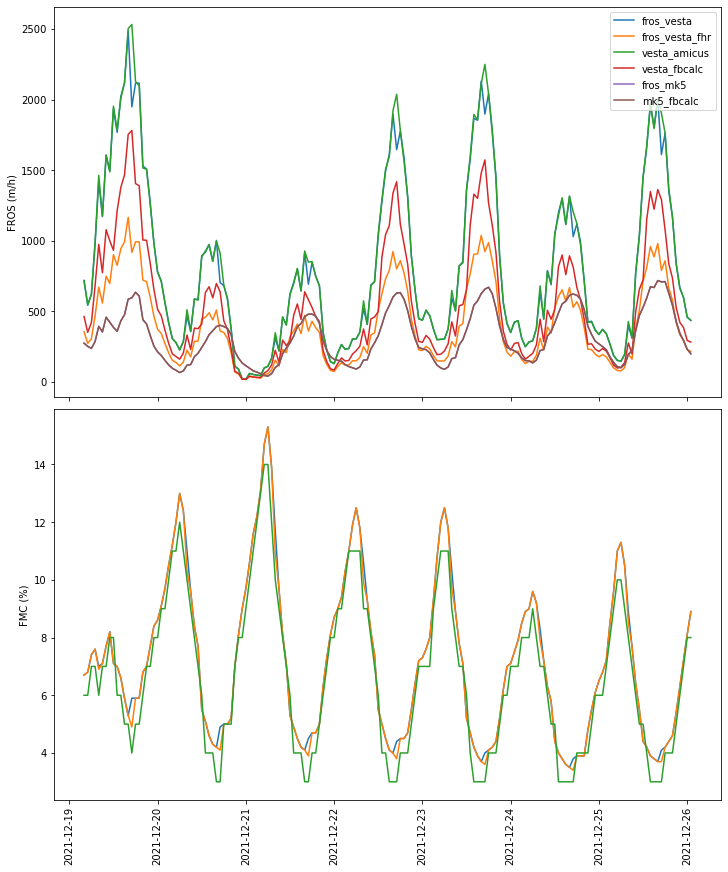

In [7]:
import matplotlib.pyplot as plt
fig, (ax_fros, ax_mc) = plt.subplots(2,1, sharex=True,constrained_layout=True, figsize=(10,12))

ax_dict = {
    'FROS (m/h)': [ax_fros, 'fros_vesta', 'fros_vesta_fhr', 'vesta_amicus', 'vesta_fbcalc', 'fros_mk5', 'mk5_fbcalc'],
    'FMC (%)': [ax_mc, 'mc', 'mc_amicus', 'mc_fbcalc'],
}

for label, val in ax_dict.items():
    for col in val[1:]:
        val[0].plot(incident.df['date_time'],incident.df[col], label=col)
    val[0].set_ylabel(label)

ax_fros.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()